In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import glob
from datetime import datetime, timedelta
import matplotlib.font_manager as fm
import os


In [22]:
# Read the event file
file_path = './data/2024/events.csv'
events_df = pd.read_csv(file_path, parse_dates=['Date'], encoding='latin1')

# Get the list of leaderboard files
file_list = sorted(glob.glob("./data/2024/2024-*-*-*.csv"))

# Parse the dates and parts from filenames
file_info = []
for file in file_list:
    # Extract year, month, day, and part from the filename
    parts = os.path.basename(file).split('-')
    YYYY = parts[0]
    MM = parts[1]
    DD = parts[2]
    part_str = parts[3]
    part = part_str.split('(')[1].split(')')[0]
    
    # Construct the date string
    date_str = f"{YYYY}-{MM}-{DD}"
    date = datetime.strptime(date_str, '%Y-%m-%d')
    part = int(part)
    
    # Append the parsed information to the file_info list
    file_info.append((date, part, file))

# Read all leaderboard files into a dictionary of dataframes
dataframes = {}
for date, part, file in file_info:
    try:
        df = pd.read_csv(file, encoding='latin1')
    except UnicodeDecodeError:
        df = pd.read_csv(file, encoding='latin1')
    dataframes[(date, part)] = df

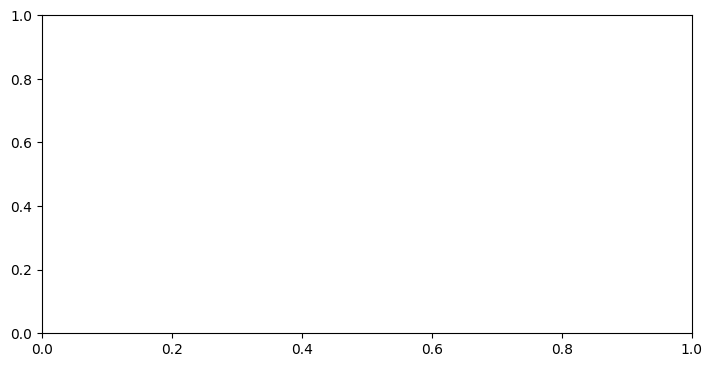

In [24]:
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(left=0.25, bottom=0.35)  # Add padding to the left and bottom

# Load the Roboto font
prop = fm.FontProperties(fname='./fonts/roboto.ttf')

# Define the start and end dates
start_date = datetime(int(YYYY), 4, 20)
end_date = datetime(int(YYYY), 6, 17)

# Variables for timestep duration
regular_timestep_duration = 1
event_timestep_duration = 2

# Variables for padding in pixels
padding_below_date_px = 5
padding_below_legend_px = 15

# Convert pixel padding to figure coordinates
fig_height = fig.get_size_inches()[1]

In [25]:
# Create the animation frames
frames = []
current_date = start_date
while current_date <= end_date:
    if not events_df[events_df['Date'] == current_date].empty:
        for part in events_df[events_df['Date'] == current_date]['Part'].unique():
            for t in range(event_timestep_duration):
                frames.append((current_date, part, True))
    else:
        for t in range(regular_timestep_duration):  # Each day will stay for 'regular_timestep_duration' timesteps
            frames.append((current_date, t, False))
    current_date += timedelta(days=1)

In [29]:
# Function to format date in "20th of April 2024" format
def format_date(date):
    return date.strftime(f"{date.day}{'st' if date.day == 1 else 'nd' if date.day == 2 else 'rd' if date.day == 3 else 'th'} of %B %Y")

# Function to draw the bar chart for each frame
def update(frame):
    date, part, is_event = frame
    ax.clear()
    key = (date, 0 if not is_event else part)
    print(f"Drawing {key}")
    
    if key in dataframes:
        df = dataframes[key]
    else:
        prev_key = max([k for k in dataframes.keys() if k[0] <= date], default=None)
        if prev_key:
            df = dataframes[prev_key]
    print(f"Drawing {key} with {len(df)} participants")
    print(df.head())
    df = df.sort_values(by='Total', ascending=True)
    categories = ['Individual', 'Round 1', 'Round 2', 'Conf. final', 'Final']
    df.set_index('Name', inplace=True)

    df[categories].plot(kind='barh', stacked=True, ax=ax, color=['#4285f4', '#ea4335', '#fbbc04', '#34a853', '#ff6d01'])
    
    # Set the formatted date as the title
    title = format_date(date)
    ax.set_title(title, fontproperties=prop)
    ax.set_xlabel("Points", fontproperties=prop)
    ax.set_ylabel("Participants", fontproperties=prop)
    
    # Display the event description
    if is_event:
        event_df = events_df[(events_df['Date'] == date) & (events_df['Part'] == part)]
        if not event_df.empty:
            event = event_df['Event'].values[0]
            ax.text(0.5, -0.25, event, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12, fontproperties=prop)
    
    # Set the legend to the bottom right corner
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='lower right', bbox_to_anchor=(1, 0), fontsize=10, frameon=False)
    
    # Adjust x-axis limits
    max_value = df[categories].sum(axis=1).max()
    if max_value > 0:
        ax.set_xlim(0, max(15, max_value * 1.1))  # Add some padding for better visibility
    else:
        ax.set_xlim(0, 15)

In [30]:
for i in range(0, 50):
    update(frames[i])

Drawing (datetime.datetime(2024, 4, 20, 0, 0), 0)
Drawing (datetime.datetime(2024, 4, 20, 0, 0), 0) with 18 participants
   Rank              Name  Total  Individual  Round 1  Round 2  Conf. final  \
0     1             Bo Yi      0           0        0        0            0   
1     1             Burak      0           0        0        0            0   
2     1           Gaetano      0           0        0        0            0   
3     1      Hashim Karim      0           0        0        0            0   
4     1  Ioannis Zygouris      0           0        0        0            0   

   Final  
0      0  
1      0  
2      0  
3      0  
4      0  
Drawing (datetime.datetime(2024, 4, 20, 0, 0), 0)
Drawing (datetime.datetime(2024, 4, 20, 0, 0), 0) with 18 participants
   Rank              Name  Total  Individual  Round 1  Round 2  Conf. final  \
0     1             Bo Yi      0           0        0        0            0   
1     1             Burak      0           0        0      